In [1]:
import pandas as pd
import numpy as np
url = (r'C:\Users\sande\Downloads\football_data\shots1.csv')
df = pd.read_csv(url)
df.head(6)

,id,location,match_id,shot_end_location,shot_outcome,competition_name,season_name
0,e2be6784-0093-4126-8d52-8dcc3b9348a8,"[100.0, 19.0]",15998,"[120.0, 35.1, 0.1]",Off T,La Liga,2018/2019
1,2a93e572-ef0e-4db8-931d-96847f4d34d4,"[107.1, 38.1]",15998,"[119.7, 28.4]",Wayward,La Liga,2018/2019
2,038e137e-b1a5-4e62-81d2-cbbce59d0446,"[98.1, 38.5]",15998,"[120.0, 42.8, 0.7]",Goal,La Liga,2018/2019
3,64a50bc2-60e7-4340-b4c2-4929a6379404,"[95.8, 42.0]",15998,"[120.0, 35.9, 3.0]",Post,La Liga,2018/2019
4,4eaa5f1c-d50f-4ef9-a8a4-553f9f27c6fe,"[100.4, 41.6]",15998,"[118.1, 39.1, 0.2]",Saved,La Liga,2018/2019
5,7de98f9e-46c8-4a23-9c7c-2af8a086c1a7,"[89.6, 29.2]",15998,"[120.0, 47.3, 3.7]",Off T,La Liga,2018/2019


In [2]:
df.competition_name.value_counts()

La Liga             10085
Champions League      443
Name: competition_name, dtype: int64

In [3]:
df.shot_outcome.value_counts()

Off T               3301
Saved               2739
Blocked             2350
Goal                1463
Wayward              323
Post                 292
Saved Off Target      39
Saved to Post         21
Name: shot_outcome, dtype: int64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load
#import shap
from mplsoccer import Pitch, FontManager, Sbopen

In [5]:
from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder().fit(df['competition_name'])
#df['competition_name'] = le.transform(df['competition_name'])
df["season_name"]= df["season_name"].str.split("/", n = 1, expand = False)
df.head(3)

#df["shot_end_location"]= df["shot_end_location"].str.split(",",n=1, expand = False)
#print(df['season_name'][0].str[0])
#print(df['shot_end_location'].apply(lambda x:x[1]))
#df = df.loc[:, df.columns != 'id']
#df.info()


,id,location,match_id,shot_end_location,shot_outcome,competition_name,season_name
0,e2be6784-0093-4126-8d52-8dcc3b9348a8,"[100.0, 19.0]",15998,"[120.0, 35.1, 0.1]",Off T,La Liga,"[2018, 2019]"
1,2a93e572-ef0e-4db8-931d-96847f4d34d4,"[107.1, 38.1]",15998,"[119.7, 28.4]",Wayward,La Liga,"[2018, 2019]"
2,038e137e-b1a5-4e62-81d2-cbbce59d0446,"[98.1, 38.5]",15998,"[120.0, 42.8, 0.7]",Goal,La Liga,"[2018, 2019]"


In [6]:
df['start_x'], df['start_y'] = df['location'].str.split(',', 1).str
#df['location'].str.split(',').str[0]
#df
#df = pd.DataFrame(df.row.str.split(',',1).tolist(), columns = ['fips','row'])
#df[df.apply(lambda x: x['location'][0] > 0 , axis=1)]
df["start_x"] = df["start_x"].str[1:]
df["start_y"] = df["start_y"].str[:-1]

df['End_x'], df['End_y'] = df['shot_end_location'].str.split(',', 1).str
df["End_x"] = df["End_x"].str[1:]

#df["End_y"] = df['End_y'].str.split(',',n=1, expand = False)

C:\Users\sande\AppData\Local\Temp/ipykernel_6764/2168223703.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['start_x'], df['start_y'] = df['location'].str.split(',', 1).str
C:\Users\sande\AppData\Local\Temp/ipykernel_6764/2168223703.py:9: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['End_x'], df['End_y'] = df['shot_end_location'].str.split(',', 1).str


In [7]:
df['End_y'] = df['End_y'].str.split(',',n=1, expand = False)
print(type(df['End_y'][0]))
df['xg'] = df['shot_end_location'].str[1:-1]
df['xg'] = df['xg'].str.split(',', expand = False)
#if len(df['xg'].value) == 2:
print(len(df['xg']))   
df['xg'] = df['xg'].apply(lambda x:np.append(x,1.0) if len(x) == 2 else x)
df['xg']=df['xg'].apply(lambda x:x[2])
df['End_y']=df['End_y'].apply(lambda x:x[0])
df['End_y']=df['End_y'].str.split(']', expand = False)
df['End_y']=df['End_y'].apply(lambda x:x[0])
df['start_x']= df['start_x'].astype(float)
df['start_y']=df['start_y'].astype(float)
df['End_x']=df['End_x'].astype(float)
df['End_y']=df['End_y'].astype(float)
df['xg']=df['xg'].astype(float)
df.head(5)

<class 'list'>
10528


,id,location,match_id,shot_end_location,shot_outcome,competition_name,season_name,start_x,start_y,End_x,End_y,xg
0,e2be6784-0093-4126-8d52-8dcc3b9348a8,"[100.0, 19.0]",15998,"[120.0, 35.1, 0.1]",Off T,La Liga,"[2018, 2019]",100.0,19.0,120.0,35.1,0.1
1,2a93e572-ef0e-4db8-931d-96847f4d34d4,"[107.1, 38.1]",15998,"[119.7, 28.4]",Wayward,La Liga,"[2018, 2019]",107.1,38.1,119.7,28.4,1.0
2,038e137e-b1a5-4e62-81d2-cbbce59d0446,"[98.1, 38.5]",15998,"[120.0, 42.8, 0.7]",Goal,La Liga,"[2018, 2019]",98.1,38.5,120.0,42.8,0.7
3,64a50bc2-60e7-4340-b4c2-4929a6379404,"[95.8, 42.0]",15998,"[120.0, 35.9, 3.0]",Post,La Liga,"[2018, 2019]",95.8,42.0,120.0,35.9,3.0
4,4eaa5f1c-d50f-4ef9-a8a4-553f9f27c6fe,"[100.4, 41.6]",15998,"[118.1, 39.1, 0.2]",Saved,La Liga,"[2018, 2019]",100.4,41.6,118.1,39.1,0.2


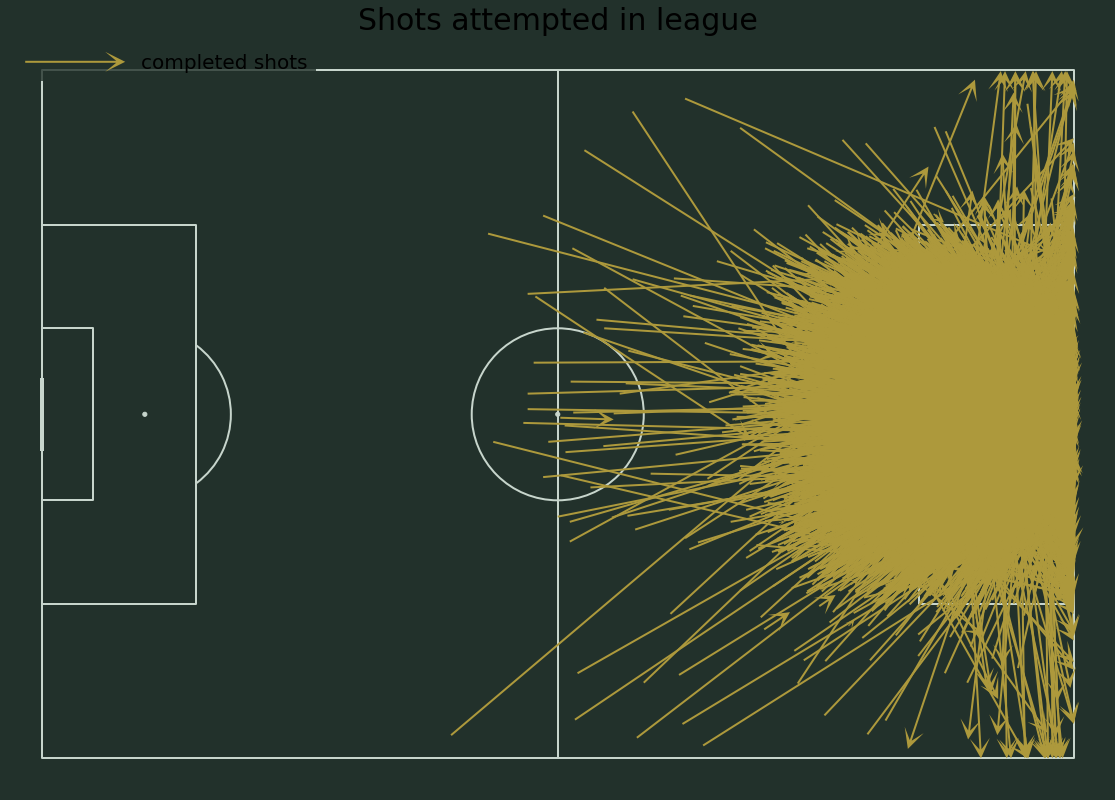

In [8]:
df_shots = df.copy()#df[['start_x', 'start_y', 'End_x', 'End_y', 'shot_outcome','match_id']]
mask_complete = df_shots.shot_outcome.isnull()
df_shots

pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

pitch.arrows(df_shots[~mask_complete].start_x, df_shots[~mask_complete].start_y,
             df_shots[~mask_complete].End_x, df_shots[~mask_complete].End_y, width=2,
             headwidth=10, headlength=10, color='#ad993c', ax=ax, label='completed shots')
ax.legend(facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')
ax_title = ax.set_title('Shots attempted in league', fontsize=30)

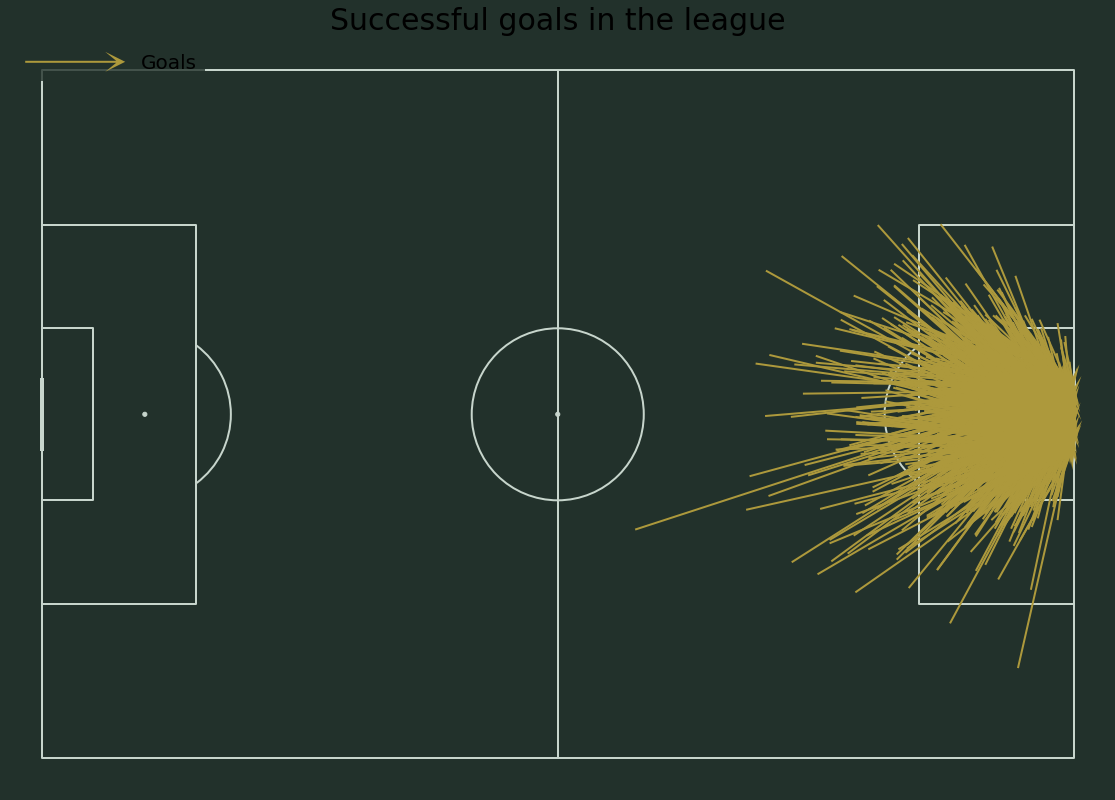

In [9]:
mask_complete = df_shots.shot_outcome == 'Goal'

pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
pitch.arrows(df_shots[mask_complete].start_x, df_shots[mask_complete].start_y,
             df_shots[mask_complete].End_x, df_shots[mask_complete].End_y, width=2,
             headwidth=10, headlength=10, color='#ad993c', ax=ax, label='Goals')
ax.legend(facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')
ax_title = ax.set_title('Successful goals in the league', fontsize=30)

In [10]:
df_shots

,id,location,match_id,shot_end_location,shot_outcome,competition_name,season_name,start_x,start_y,End_x,End_y,xg
0,e2be6784-0093-4126-8d52-8dcc3b9348a8,"[100.0, 19.0]",15998,"[120.0, 35.1, 0.1]",Off T,La Liga,"[2018, 2019]",100.0,19.0,120.0,35.1,0.1
1,2a93e572-ef0e-4db8-931d-96847f4d34d4,"[107.1, 38.1]",15998,"[119.7, 28.4]",Wayward,La Liga,"[2018, 2019]",107.1,38.1,119.7,28.4,1.0
2,038e137e-b1a5-4e62-81d2-cbbce59d0446,"[98.1, 38.5]",15998,"[120.0, 42.8, 0.7]",Goal,La Liga,"[2018, 2019]",98.1,38.5,120.0,42.8,0.7
3,64a50bc2-60e7-4340-b4c2-4929a6379404,"[95.8, 42.0]",15998,"[120.0, 35.9, 3.0]",Post,La Liga,"[2018, 2019]",95.8,42.0,120.0,35.9,3.0
4,4eaa5f1c-d50f-4ef9-a8a4-553f9f27c6fe,"[100.4, 41.6]",15998,"[118.1, 39.1, 0.2]",Saved,La Liga,"[2018, 2019]",100.4,41.6,118.1,39.1,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
10523,6653337b-5599-453f-872d-379cfb5823eb,"[95.9, 45.2]",69323,"[120.0, 31.8, 6.4]",Off T,La Liga,"[2011, 2012]",95.9,45.2,120.0,31.8,6.4
10524,7afa362d-de22-4a37-ac93-7d2f7579c593,"[109.4, 27.8]",69323,"[111.7, 30.2]",Blocked,La Liga,"[2011, 2012]",109.4,27.8,111.7,30.2,1.0
10525,36ec2b3a-e40c-40bb-8c60-fc92bebf3a93,"[100.9, 20.7]",69323,"[107.9, 27.1]",Blocked,La Liga,"[2011, 2012]",100.9,20.7,107.9,27.1,1.0
10526,8645c39f-b071-4b79-ba36-ab433ef4d79b,"[111.5, 26.8]",69323,"[120.0, 41.0, 2.8]",Post,La Liga,"[2011, 2012]",111.5,26.8,120.0,41.0,2.8


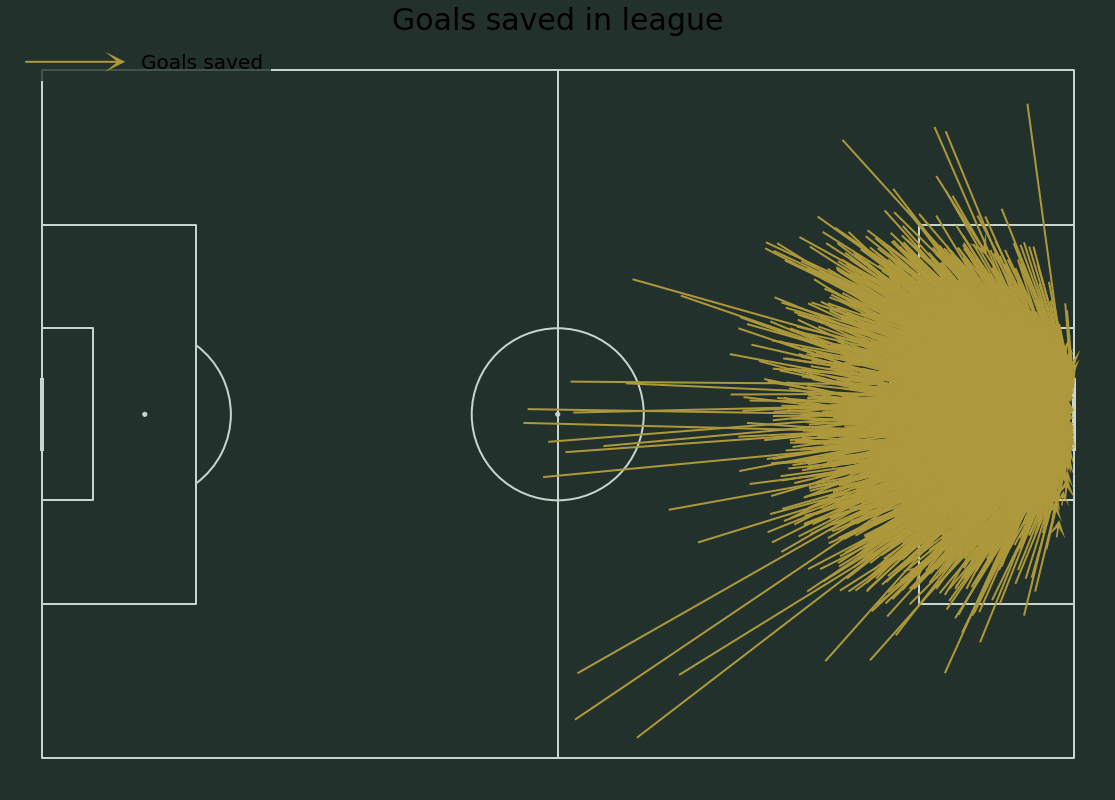

In [11]:
goal_saved = df_shots.shot_outcome == 'Saved'#df_shots[(df_shots.shot_outcome == 'Goal') & (df_shots.season_name.apply(lambda x:x[0] == 2018))].copy()

pitch = Pitch(pitch_type='statsbomb',pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
pitch.arrows(df_shots[goal_saved].start_x, df_shots[goal_saved].start_y,
             df_shots[goal_saved].End_x, df_shots[goal_saved].End_y, width=2,
             headwidth=10, headlength=10, color='#ad993c', ax=ax, label='Goals saved')
ax.legend(facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')
ax_title = ax.set_title('Goals saved in league', fontsize=30)

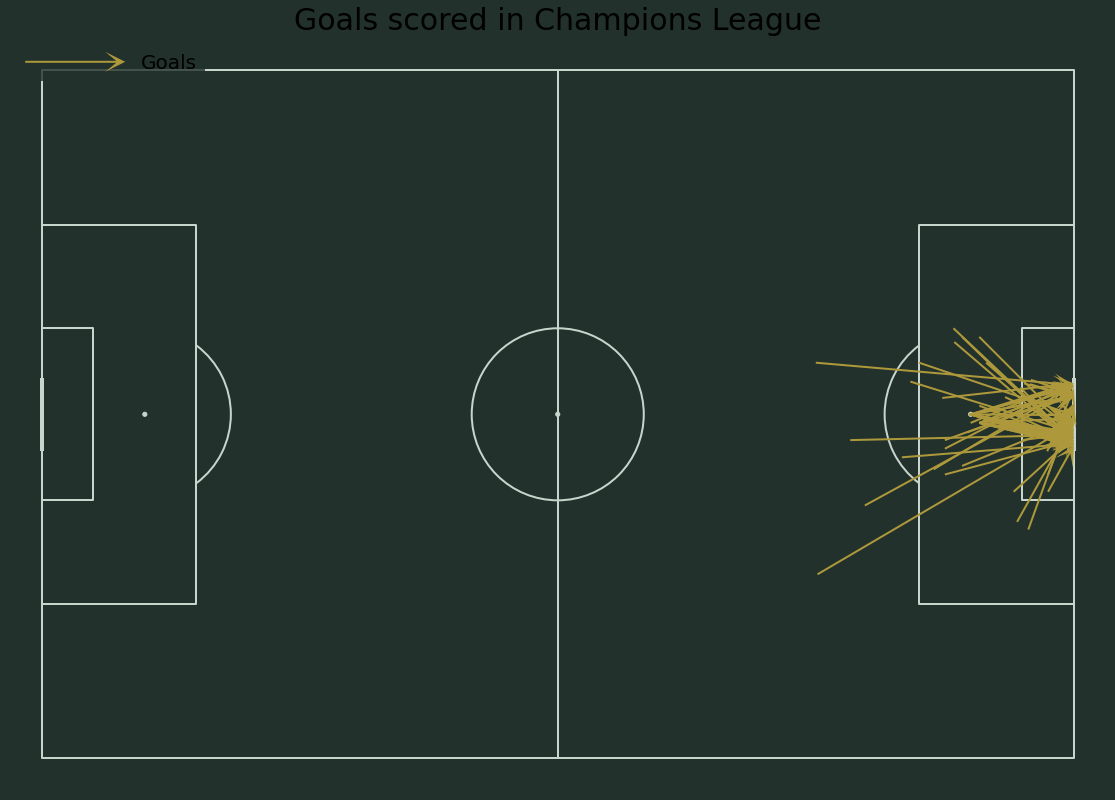

In [12]:
Champions_league_g = df_shots[(df_shots.competition_name == 'Champions League')].copy()
Goals_scored = Champions_league_g.shot_outcome == 'Goal'

pitch = Pitch(pitch_type='statsbomb',pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
pitch.arrows(Champions_league_g[Goals_scored].start_x, Champions_league_g[Goals_scored].start_y,
             Champions_league_g[Goals_scored].End_x, Champions_league_g[Goals_scored].End_y, width=2,
             headwidth=10, headlength=10, color='#ad993c', ax=ax, label='Goals')

ax.legend(facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')
ax_title = ax.set_title('Goals scored in Champions League', fontsize=30)

Shot Map

In [13]:
df['competition_name'].value_counts()
print(df.season_name[0][0])

2018


In [14]:
#df_shots_s = df[(df.competition_name == 0)].copy()# & (df.season_name.apply(lambda x:x[0] == 2018))].copy()
#df_shots_s                                               
df_shots_season = df[(df.competition_name == 'La Liga')].copy()                                             
#df_shots_season 


In [15]:
#shots_off_df = df[(df.season_name.apply(lambda x:x[:][0] == '2011'))].copy()
#shots_off_df

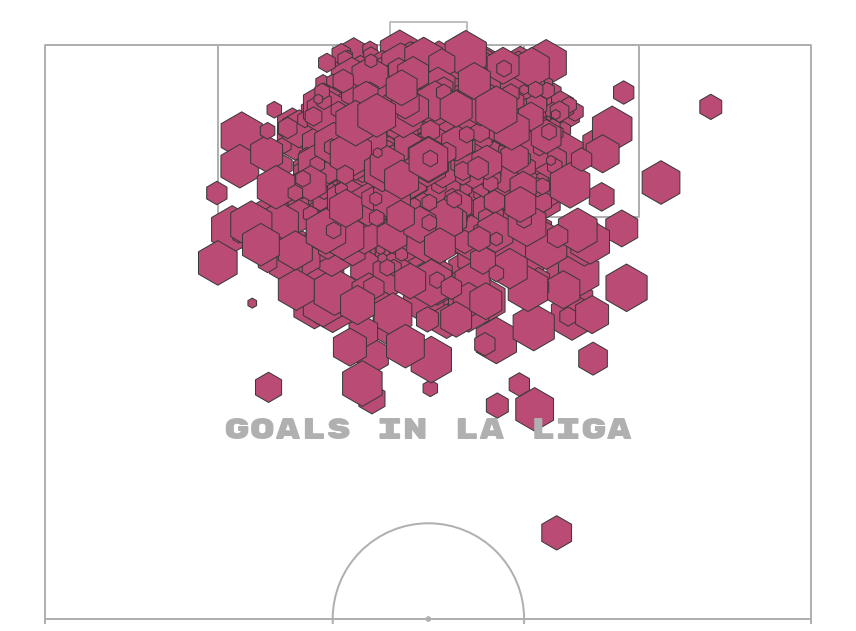

In [16]:
from mplsoccer import (VerticalPitch, Pitch, create_transparent_cmap,
                       FontManager, arrowhead_marker, Sbopen)

# get data for a Sevilla versus Barcelona match with a high amount of shots
#parser = Sbopen()
#df, related, freeze, tactics = parser.event(9860)
#df_shots_season = df[(df.competition_name == 0) & (df.season_name.apply(lambda x:x[0] == 2018)].copy()
# subset the barcelona shots
#df_shots_barca = df[(df.type_name == 'Shot') & (df.team_name == 'Barcelona')].copy()
# subset the barca open play passes
#df_pass_barca = df[(df.type_name == 'Pass') &
#                   (df.team_name == 'Barcelona') &
#                   (~df.sub_type_name.isin(['Throw-in', 'Corner', 'Free Kick', 'Kick Off']))].copy()
df_goals_season = df_shots_season[(df.shot_outcome == 'Goal')]
# setup a mplsoccer FontManager to download google fonts (SigmarOne-Regular)
fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/'
                       'rubikmonoone/RubikMonoOne-Regular.ttf')

pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8)  # control the goal transparency
fig, ax = pitch.draw(figsize=(12, 10))
sc = pitch.scatter(df_goals_season.start_x, df_goals_season.start_y,
                   # size varies between 100 and 1000 (points squared)
                   s=(df_goals_season.xg * 900) + 100,
                   c='#b94b75',  # color for scatter in hex format
                   edgecolors='#383838',  # give the markers a charcoal border
                   # for other markers types see: https://matplotlib.org/api/markers_api.html
                   marker='h',
                   ax=ax)

txt = ax.text(x=40, y=80, s='Goals in La Liga',
              size=30,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties=fm_rubik.prop, color=pitch.line_color,
              va='center', ha='center')


In [17]:
#df_shots_s = df[(df.competition_name == 0) & (df.season_name.apply(lambda x:x[0] == '2018'))].copy()

df_shots_season1 = df[(df.competition_name == 'La Liga') & (df.season_name.apply(lambda x:x[0] == '2015'))].copy()

df_shots_season1

,id,location,match_id,shot_end_location,shot_outcome,competition_name,season_name,start_x,start_y,End_x,End_y,xg
2797,575c9724-2710-4df3-b8f5-6f4610a8ce3b,"[108.0, 40.0]",266498,"[119.3, 42.3, 0.1]",Saved,La Liga,"[2015, 2016]",108.0,40.0,119.3,42.3,0.1
2798,61b80656-1c6d-40dd-a8b2-7ed89b4add7f,"[92.1, 34.1]",266498,"[120.0, 34.9, 5.7]",Off T,La Liga,"[2015, 2016]",92.1,34.1,120.0,34.9,5.7
2799,d6a15c7b-f721-4927-b44c-92f735879fdc,"[111.8, 39.9]",266498,"[120.0, 40.7, 1.4]",Goal,La Liga,"[2015, 2016]",111.8,39.9,120.0,40.7,1.4
2800,c7113e4a-7b8c-4da4-9c5a-f5dea605230c,"[108.4, 55.3]",266498,"[109.3, 54.3]",Blocked,La Liga,"[2015, 2016]",108.4,55.3,109.3,54.3,1.0
2801,85b3a899-4525-4f47-a8f1-88d65efa267c,"[116.0, 36.8]",266498,"[118.6, 37.3, 1.5]",Saved to Post,La Liga,"[2015, 2016]",116.0,36.8,118.6,37.3,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...
3621,6b92e6e5-4805-4b29-bf9a-345689ceab83,"[105.8, 40.0]",266557,"[116.3, 38.3, 0.6]",Saved,La Liga,"[2015, 2016]",105.8,40.0,116.3,38.3,0.6
3622,3b0a66a1-53db-4822-b38a-8f602d14899c,"[110.3, 34.4]",266557,"[114.3, 35.8]",Blocked,La Liga,"[2015, 2016]",110.3,34.4,114.3,35.8,1.0
3623,3cb6cab9-18ca-4064-b458-e45d356c9542,"[106.2, 40.1]",266557,"[108.6, 40.3]",Blocked,La Liga,"[2015, 2016]",106.2,40.1,108.6,40.3,1.0
3624,0613e885-5532-441c-be5c-a3f34492836e,"[111.1, 41.7]",266557,"[119.0, 33.0]",Wayward,La Liga,"[2015, 2016]",111.1,41.7,119.0,33.0,1.0


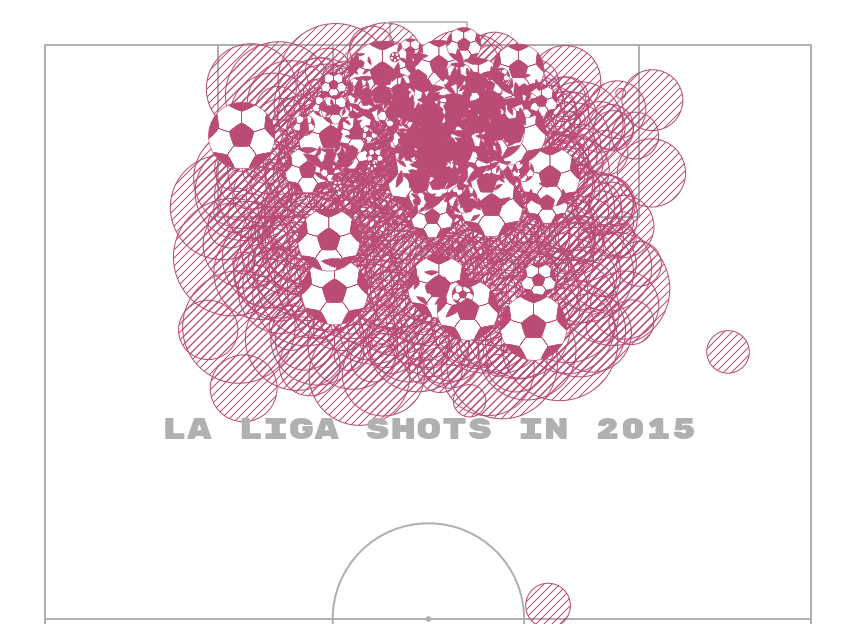

In [18]:

df_goals_s = df_shots_season1[df_shots_season1.shot_outcome == 'Goal'].copy()
df_non_goal_shots_s = df_shots_season1[df_shots_season1.shot_outcome != 'Goal'].copy()

fig, ax = pitch.draw(figsize=(12, 10))

# plot non-goal shots with hatch
sc1 = pitch.scatter(df_non_goal_shots_s.start_x, df_non_goal_shots_s.start_y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_non_goal_shots_s.xg * 1900) + 100,
                    edgecolors='#b94b75',  # give the markers a charcoal border
                    c='None',  # no facecolor for the markers
                    hatch='///',  # the all important hatch (triple diagonal lines)
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='o',
                    ax=ax)

# plot goal shots with a football marker
# 'edgecolors' sets the color of the pentagons and edges, 'c' sets the color of the hexagons
sc2 = pitch.scatter(df_goals_s.start_x, df_goals_s.start_y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_s.xg * 1900) + 100,
                    edgecolors='#b94b75',
                    linewidth=0.6,
                    c='white',
                    marker='football',
                    ax=ax)

txt = ax.text(x=40, y=80, s='La Liga shots in 2015',
              size=30,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties=fm_rubik.prop, color=pitch.line_color,
              va='center', ha='center')

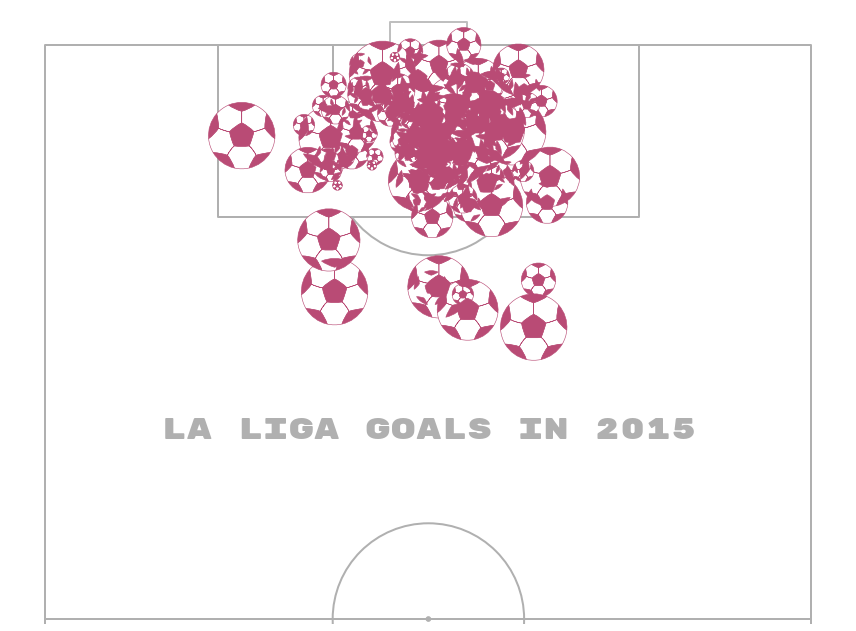

In [19]:

df_goals_s = df_shots_season1[(df_shots_season1.shot_outcome == 'Goal')].copy()
df_non_goal_shots_s = df_shots_season1[df_shots_season1.shot_outcome != 'Goal'].copy()

fig, ax = pitch.draw(figsize=(12, 10))

# plot non-goal shots with hatch
sc2 = pitch.scatter(df_goals_s.start_x, df_goals_s.start_y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_s.xg * 1900) + 100,
                    edgecolors='#b94b75',
                    linewidth=0.6,
                    c='white',
                    marker='football',
                    ax=ax)
txt = ax.text(x=40, y=80, s='La Liga goals in 2015',
              size=30,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties=fm_rubik.prop, color=pitch.line_color,
              va='center', ha='center')

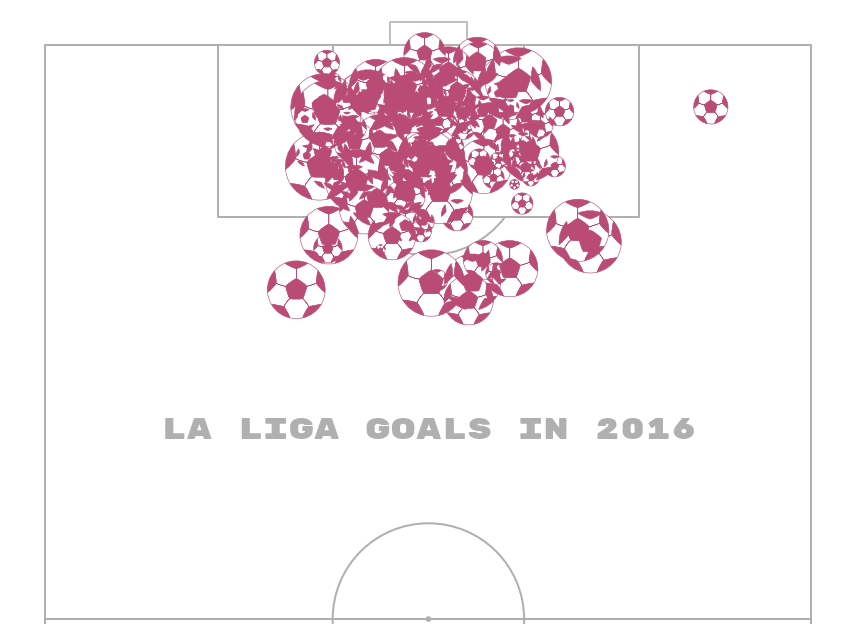

In [20]:

df_shots_next_season = df[(df.competition_name == 'La Liga') & (df.season_name.apply(lambda x:x[0] == '2016'))].copy()

df_goals_next_season = df_shots_next_season[(df_shots_next_season.shot_outcome == 'Goal')].copy()
fig, ax = pitch.draw(figsize=(12, 10))

# plot non-goal shots with hatch
sc4 = pitch.scatter(df_goals_next_season.start_x, df_goals_next_season.start_y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_next_season.xg * 1900) + 100,
                    edgecolors='#b94b75',
                    linewidth=0.6,
                    c='white',
                    marker='football',
                    ax=ax)

txt = ax.text(x=40, y=80, s='La Liga goals in 2016',
              size=30,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties=fm_rubik.prop, color=pitch.line_color,
              va='center', ha='center')

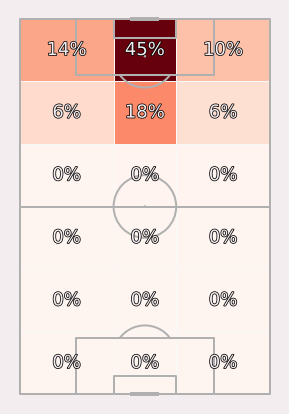

In [21]:

import matplotlib.patheffects as path_effects
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter

path_eff = [path_effects.Stroke(linewidth=1.5, foreground='black'),
            path_effects.Normal()]

pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#f4edf0')
fig, ax = pitch.draw(figsize=(4.125, 6))
fig.set_facecolor('#f4edf0')
bin_x = np.linspace(pitch.dim.left, pitch.dim.right, num=7)
bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom,
                          pitch.dim.six_yard_top, pitch.dim.top]))
bin_statistic = pitch.bin_statistic(df_shots_season.start_x, df_shots_season.start_y, statistic='count',
                                    bins=(bin_x, bin_y), normalize=True)
pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolor='#f9f9f9')
labels2 = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                              ax=ax, ha='center', va='center',
                              str_format='{:.0%}', path_effects=path_eff)

#Pitch locations with heatmap of 14 zones

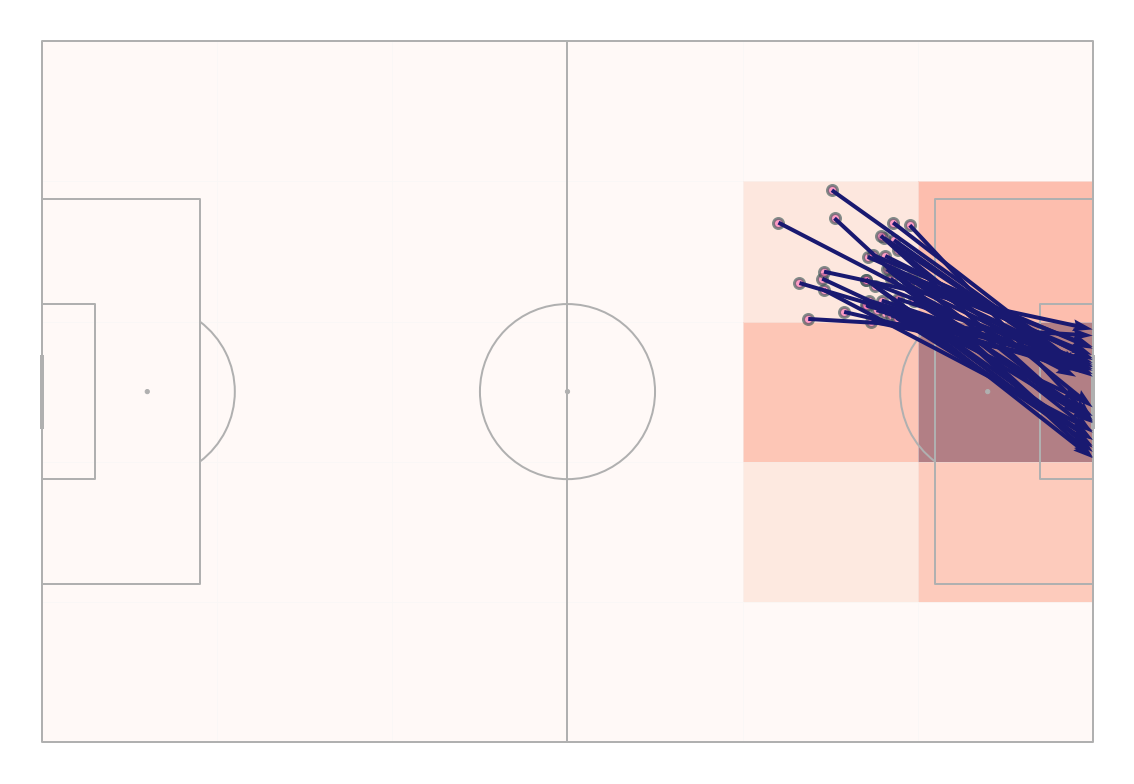

In [22]:
pitch = Pitch(line_zorder=2)
fig, ax = pitch.draw(figsize=(16, 11))
bin_statistic = pitch.bin_statistic(df_shots_season1.start_x,df_shots_season1.start_y, bins=(6, 5))
bin_statistic_end = pitch.bin_statistic(df_shots_season1.End_x, df_shots_season1.End_y, bins=(6, 5))

# let's get a mask for all shots that started in one grid cell and ended in another
mask_start = np.logical_and(bin_statistic['binnumber'][0] == 4,  # xs 5th box from left (zero indexed)
                            bin_statistic['binnumber'][1] == 1)  # ys 2nd from bottom (zero indexed)
mask_end = np.logical_and(bin_statistic_end['binnumber'][0] == 5,  # xs 6th box from left (zero indexed)
                          bin_statistic_end['binnumber'][1] == 2)  # ys 3rd box from bottom (zero indexed)
mask = np.logical_and(mask_start, mask_end)

# plot the shot that started in one grid cell and ended in another
pitch.scatter(df_shots_season1.start_x[mask], df_shots_season1.start_y[mask], ax=ax, fc='hotpink',
              marker='o', s=100, ec='darkslategrey', lw=3, alpha=0.6, zorder=4)
pitch.arrows(df_shots_season1.start_x[mask], df_shots_season1.start_y[mask], df_shots_season1.End_x[mask], df_shots_season1.End_y[mask],
             ax=ax, zorder=10, color='midnightblue')

# plot all of the starting locations as a heatmap
pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolor='#f9f9f9', alpha=0.5)

plt.show()  

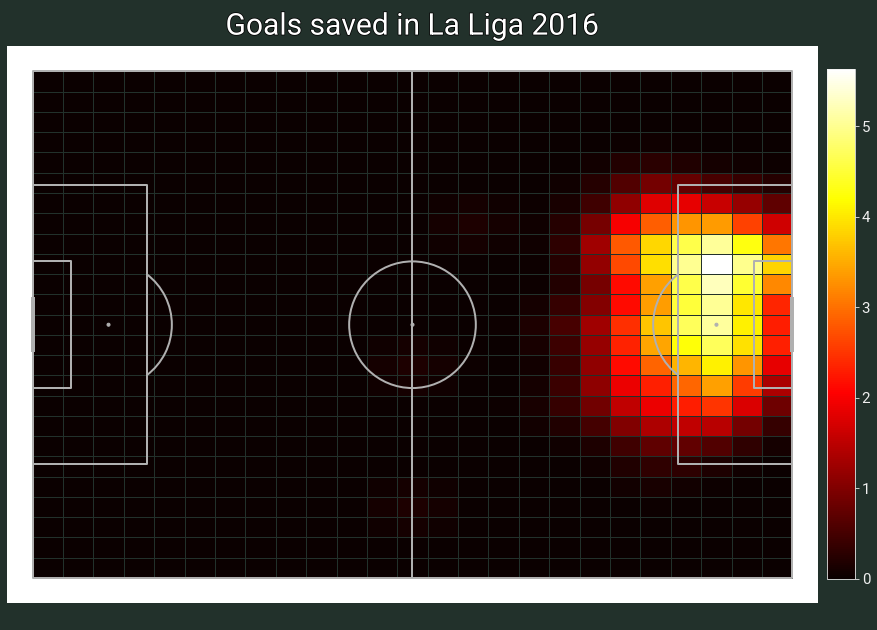

In [23]:
df_saved = df_shots_next_season[(df_shots_next_season.shot_outcome == 'Saved')].copy()
robotto_regular = FontManager()
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      # leave some space for the colorbar
                      grid_width=0.88, left=0.025,
                      title_height=0.06, title_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.86)
fig.set_facecolor('#22312b')

# plot heatmap
bin_statistic = pitch.bin_statistic(df_saved.start_x, df_saved.start_y, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap='hot', edgecolors='#22312b')

# add cbar
ax_cbar = fig.add_axes((0.915, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(robotto_regular.prop)
    label.set_fontsize(15)
    
ax_title = axs['title'].text(0.5, 0.5, "Goals saved in La Liga 2016", color='white',
                             va='center', ha='center', path_effects=path_eff,
                             fontproperties=robotto_regular.prop, fontsize=30)

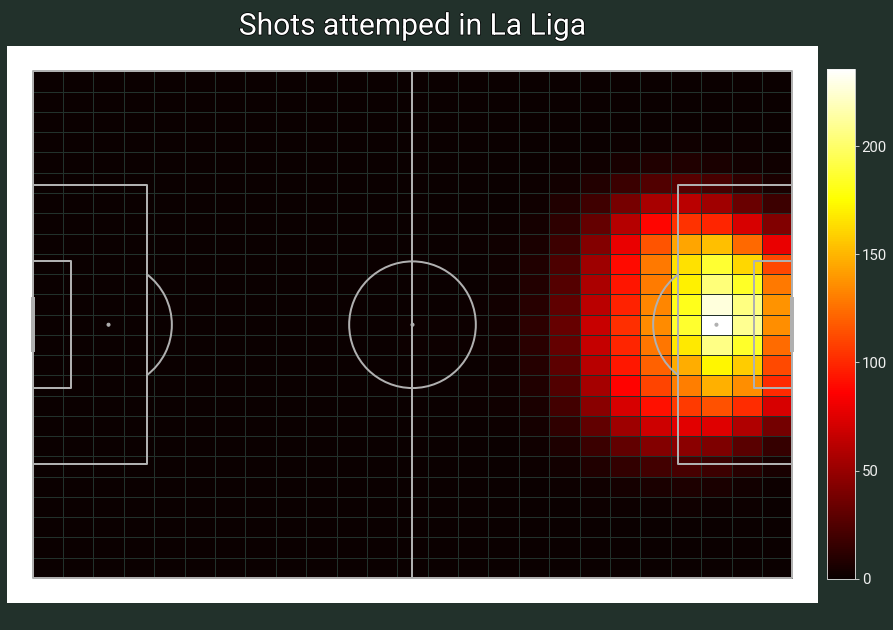

In [24]:
robotto_regular = FontManager()
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      # leave some space for the colorbar
                      grid_width=0.88, left=0.025,
                      title_height=0.06, title_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.86)
fig.set_facecolor('#22312b')

# plot heatmap
bin_statistic = pitch.bin_statistic(df_shots_season.start_x, df_shots_season.start_y, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap='hot', edgecolors='#22312b')

# add cbar
ax_cbar = fig.add_axes((0.915, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(robotto_regular.prop)
    label.set_fontsize(15)
    
ax_title = axs['title'].text(0.5, 0.5, "Shots attemped in La Liga", color='white',
                             va='center', ha='center', path_effects=path_eff,
                             fontproperties=robotto_regular.prop, fontsize=30)